In [1]:

import numpy as np
import pandas as pd
from PIL import Image
import torch
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [ ]:
!unzip data.zip

Archive:  archive.zip
   creating: archive/
  inflating: __MACOSX/._archive      
   creating: archive/valid/
  inflating: __MACOSX/archive/._valid  
  inflating: archive/.DS_Store       
  inflating: __MACOSX/archive/._.DS_Store  
   creating: archive/train/
  inflating: __MACOSX/archive/._train  
  inflating: archive/valid/c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg  
  inflating: __MACOSX/archive/valid/._c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg  
  inflating: archive/valid/c--38-_jpg.rf.6f6d22e248524cc394c14c605ee83238.jpg  
  inflating: __MACOSX/archive/valid/._c--38-_jpg.rf.6f6d22e248524cc394c14c605ee83238.jpg  
  inflating: archive/valid/c--71-_jpg.rf.b1cc381d982d258583014caf2cdc3a35.jpg  
  inflating: __MACOSX/archive/valid/._c--71-_jpg.rf.b1cc381d982d258583014caf2cdc3a35.jpg  
  inflating: archive/valid/f--138-_jpg.rf.072ce3b77221d1e986b6a16cdb665dd1.jpg  
  inflating: __MACOSX/archive/valid/._f--138-_jpg.rf.072ce3b77221d1e986b6a16cdb665dd1.jpg  
  inflating:

In [2]:
import os
for dirname, _, filenames in os.walk('data/images'):
    print(os.path.join(dirname))

data/images
data/images/valid
data/images/train


In [3]:
def get_data(path):
    images = []
    filename = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                img = Image.open(file_path)
                images.append(img)
                filename.append(file)
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
    return images, filename, df

In [4]:
train_dir = 'data/images/train'
val_dir = 'data/images/valid'

In [5]:
train_img, train_filename, train_df = get_data(train_dir)
valid_img, val_filename, val_df = get_data(val_dir)

len(train_img), len(train_filename),len(train_df), len(valid_img), len(val_filename), len(val_df)

(577, 577, 5425, 204, 204, 1701)

In [6]:
val_df.head()

filename  width  height  \
0  c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...    563     537   
1  c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...    563     537   
2  c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...    563     537   
3  c--188-_jpg.rf.df8c04f880e507f44d63d74b701f381...    563     537   
4  f--28-_jpg.rf.de4fc5ebba3bbc0baea64e669225c7c5...    563     537   

          class  xmin  ymin  xmax  ymax  
0  Microplastic   271    15   305    46  
1  Microplastic   348   265   402   308  
2  Microplastic   146   279   181   317  
3  Microplastic   477   302   542   367  
4  Microplastic   279   137   337   205

In [7]:
val_unique_filename = val_df["filename"].unique()
train_unique_filename = train_df["filename"].unique()

len(train_unique_filename), len(val_unique_filename)

(577, 204)

In [15]:
def plot_bounding_boxes_on_img(dir_name, filename, df):
    
    
    grouped = df.groupby('filename')
    df_grouped_by_filename = grouped.get_group(filename)
    
    
    print(dir_name)
    print(filename)
    img = plt.imread(os.path.join(dir_name, filename))

    
    height, width = img.shape[:2]

    
    fig, ax = plt.subplots(1)

    
    ax.imshow(img)

    for xmin, ymin, xmax, ymax in zip(df_grouped_by_filename["xmin"], df_grouped_by_filename["ymin"],df_grouped_by_filename["xmax"], df_grouped_by_filename["ymax"]):
        
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')

        
        ax.add_patch(rect)

    plt.show()

data/images/valid
c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg


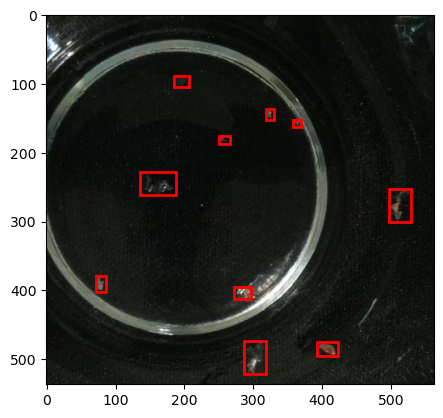

In [16]:
plot_bounding_boxes_on_img(val_dir, val_filename[0], val_df)

In [ ]:
!pip install ultralytics

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.8/41.8 kB 406.6 kB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 871.6/871.6 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 294.9/294.9 kB 3.0 MB/s eta 0:00:00a 0:00:01


In [17]:
import os

def convert_to_yolo_format(df, path_to_save):
    for index, row in df.iterrows():
        filename = row['filename'].replace('.jpg', '.txt')
        filepath = os.path.join(path_to_save, filename)
        
        with open(filepath, 'a') as f:
            
            width = row['width']
            height = row['height']
            x_center = (row['xmin'] + row['xmax']) / 2 / width
            y_center = (row['ymin'] + row['ymax']) / 2 / height
            bbox_width = (row['xmax'] - row['xmin']) / width
            bbox_height = (row['ymax'] - row['ymin']) / height
            
            
            f.write(f"0 {x_center} {y_center} {bbox_width} {bbox_height}\n")


os.makedirs('data/labels/train', exist_ok=True)
os.makedirs('data/labels/valid', exist_ok=True)


convert_to_yolo_format(train_df, 'data/labels/train')
convert_to_yolo_format(val_df, 'data/labels/valid')

In [17]:
if torch.backends.mps.is_available():
   mps_device = torch.device("mps")
   x = torch.ones(1, device=mps_device)
   print (x)
else:
   print ("MPS device not found.")

tensor([1.], device='mps:0')


In [18]:
from ultralytics import YOLO

In [19]:
model_path = 'runs/detect/train4_image_size_increasing+/weights/best.pt' 
model = YOLO(model_path)


In [20]:
import time
start_time = time.time()
predictions = model.predict(source='data/images/valid/c--60-_jpg.rf.8a696cfbdfe586ebb9ce57daebb8da17.jpg', device=mps_device, save=True)
end_time = time.time()
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.4f} seconds")


image 1/1 /Users/abdullah/Desktop/AquaLens2/data/images/valid/c--60-_jpg.rf.8a696cfbdfe586ebb9ce57daebb8da17.jpg: 1248x1280 8 Microplastics, 249.4ms
Speed: 15.8ms preprocess, 249.4ms inference, 116.4ms postprocess per image at shape (1, 3, 1248, 1280)
Results saved to runs/detect/predict6
Inference Time: 2.6450 seconds


In [22]:
metrics = model.val(data='data.yaml')

Ultralytics YOLOv8.2.85 üöÄ Python-3.10.14 torch-2.0.0 CPU (Apple M1)


val: Scanning /Users/abdullah/Desktop/Abha hackathon/data/labels/valid.cache... 204 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 204/204 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [01:54<00:00,  8.77s/it]


                   all        204       1701       0.77      0.653      0.721      0.335
Speed: 3.7ms preprocess, 547.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val


array([    0.33532])

In [24]:
metrics.__dict__

{'save_dir': PosixPath('runs/detect/val'),
 'plot': True,
 'on_plot': <bound method BaseValidator.on_plot of <ultralytics.models.yolo.detect.val.DetectionValidator object at 0x3084b57b0>>,
 'names': {0: 'Microplastic'},
 'box': ultralytics.utils.metrics.Metric object with attributes:
 
 all_ap: array([[    0.72137,     0.66499,     0.58876,      0.4895,     0.37057,     0.25925,     0.15901,    0.078349,    0.018484,   0.0029565]])
 ap: array([    0.33532])
 ap50: array([    0.72137])
 ap_class_index: array([0])
 curves: []
 curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
           0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03

In [20]:

for img_path in val_filename[:5]:  
    img_full_path = os.path.join(val_dir, img_path)
    results = model.predict(source=img_full_path, device=mps_device, save=True)
    
    
    for result in results:
        
        result.show()

        
        print(result)


NotImplementedError: The operator 'torchvision::nms' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--183-_jpg.rf.30414448e73fa023ce6bdf5cc8e536de.jpg: 1248x1280 6 Microplastics, 255.3ms
Speed: 18.9ms preprocess, 255.3ms inference, 138.9ms postprocess per image at shape (1, 3, 1248, 1280)


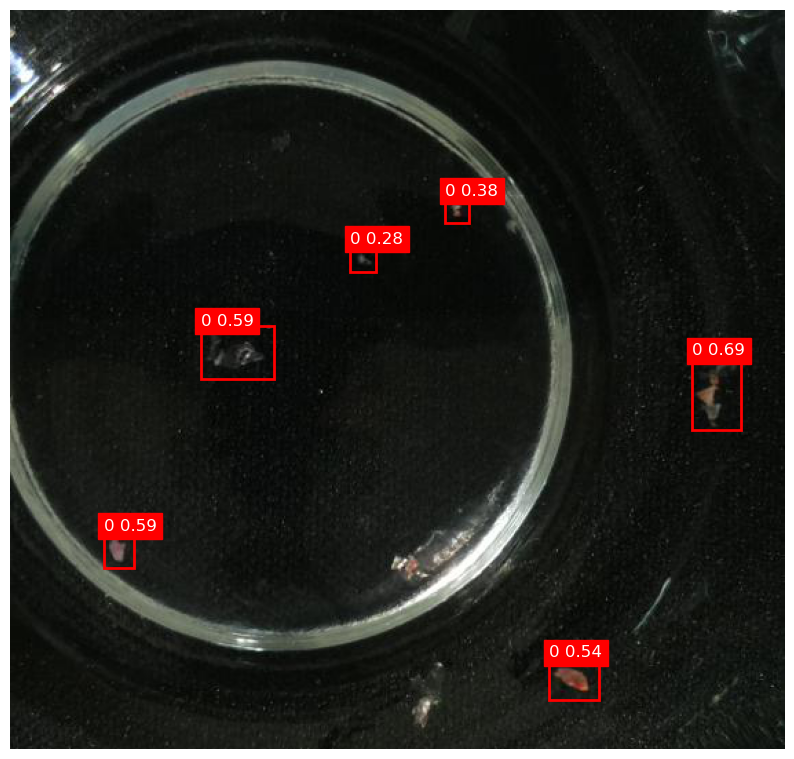


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--38-_jpg.rf.6f6d22e248524cc394c14c605ee83238.jpg: 1248x1280 7 Microplastics, 73.2ms
Speed: 6.1ms preprocess, 73.2ms inference, 68.8ms postprocess per image at shape (1, 3, 1248, 1280)


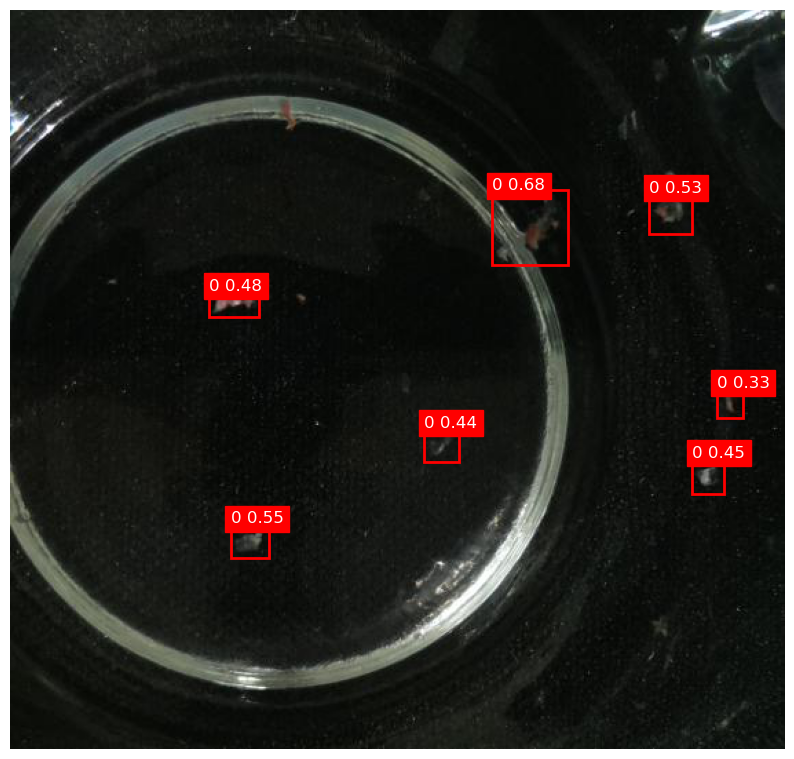


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--71-_jpg.rf.b1cc381d982d258583014caf2cdc3a35.jpg: 1248x1280 11 Microplastics, 29.7ms
Speed: 6.2ms preprocess, 29.7ms inference, 75.2ms postprocess per image at shape (1, 3, 1248, 1280)


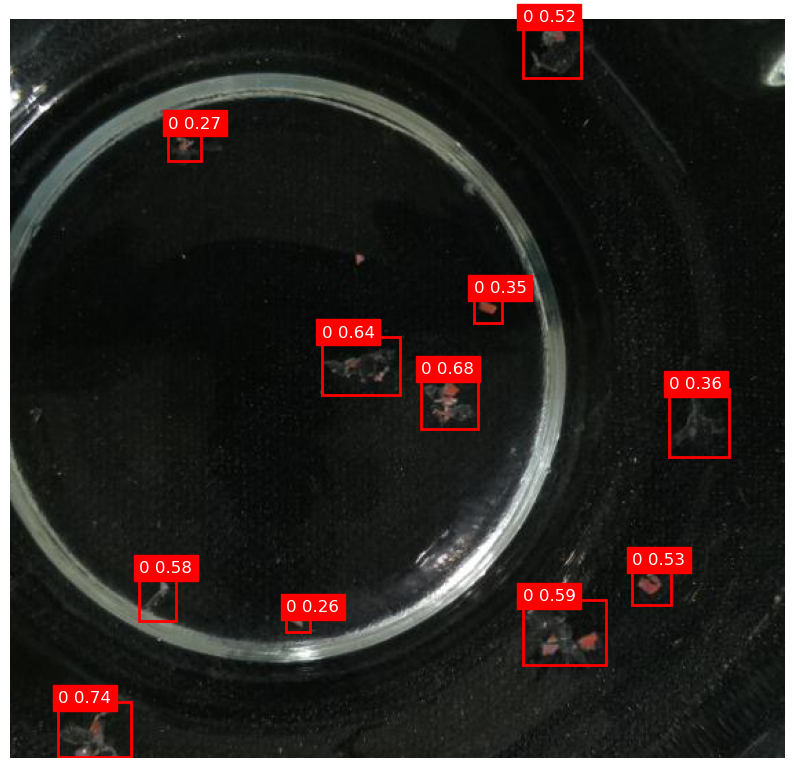


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/f--138-_jpg.rf.072ce3b77221d1e986b6a16cdb665dd1.jpg: 1248x1280 8 Microplastics, 31.5ms
Speed: 5.8ms preprocess, 31.5ms inference, 68.5ms postprocess per image at shape (1, 3, 1248, 1280)


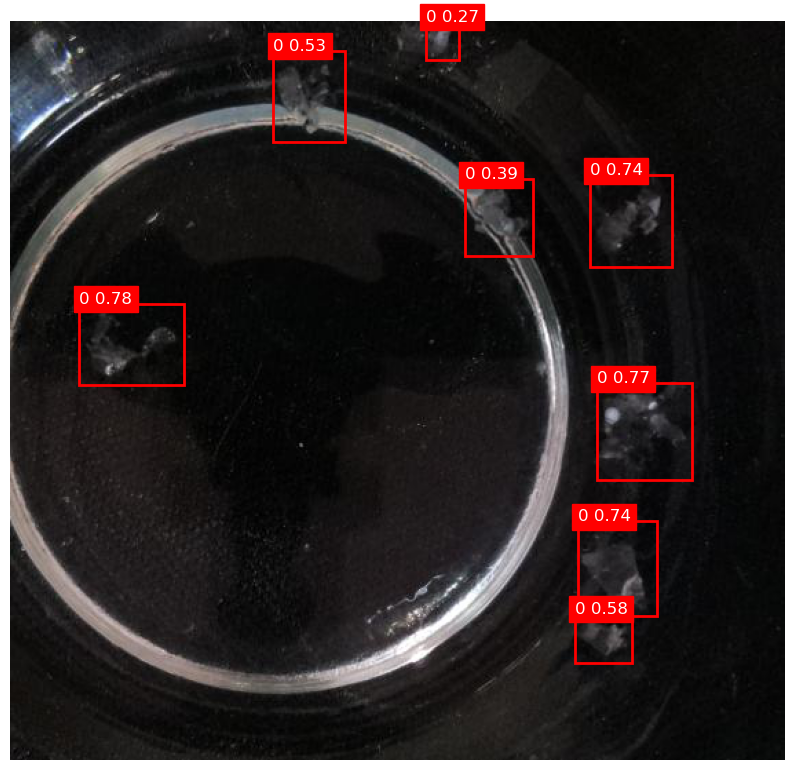


image 1/1 /Users/abdullah/Desktop/Abha hackathon/data/images/valid/c--191-_jpg.rf.3b56030b7ce84cace21b3bfe5ea58827.jpg: 1248x1280 8 Microplastics, 59.8ms
Speed: 6.3ms preprocess, 59.8ms inference, 53.6ms postprocess per image at shape (1, 3, 1248, 1280)


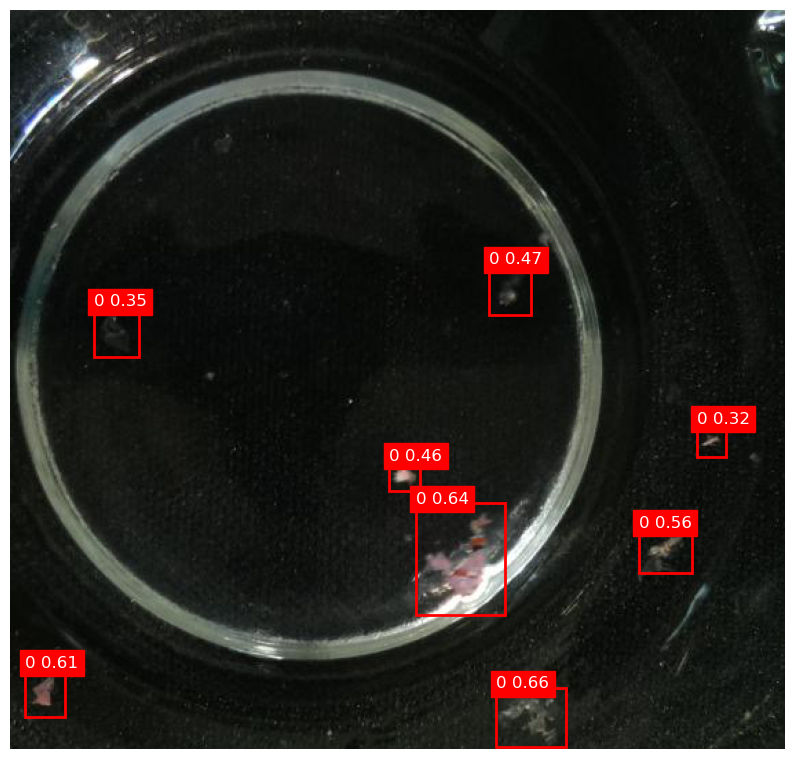

In [21]:
def visualize_predictions(results, img_path):
    img = plt.imread(img_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    
    for box in results[0].boxes:
    
        x_min, y_min, x_max, y_max = box.xyxy[0].cpu().numpy()
        confidence = box.conf.cpu().numpy().item()  
        label = int(box.cls.cpu().numpy().item())  

        rect = patches.Rectangle(
            (x_min, y_min), 
            x_max - x_min, 
            y_max - y_min, 
            linewidth=2, 
            edgecolor='r', 
            facecolor='none'
        )

        
        plt.gca().add_patch(rect)
        plt.text(x_min, y_min, f'{label} {confidence:.2f}', color='white', fontsize=12, backgroundcolor='red')

    plt.axis('off')
    plt.show()




for img_path in val_filename[:5]:  
    img_full_path = os.path.join(val_dir, img_path)
    results = model.predict(source=img_full_path, device=mps_device)
    visualize_predictions(results, img_full_path)


In [20]:
model.export(format='mlmodel')

Ultralytics YOLOv8.2.85 üöÄ Python-3.11.9 torch-2.4.0 CPU (Apple M1)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train4_image_size_increasing+/weights/best.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) (1, 5, 33600) (6.1 MB)
requirements: Ultralytics requirement ['coremltools>=6.0,<=6.2'] not found, attempting AutoUpdate...
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 909.5/909.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for coremltools: filename=coremltools-6.2-py3-none-any.whl size=1212799 sha256=12e9048356f0729c13c291d0db7572b89bbd848a289a7718c0cbdacdf2595798
  Stored in directory: /private/var/folders/9d/mbj7fqx14tgflhx7sxqm5sl00000gn/T/pip-ephem-wheel-cache-uz2ii5_b/wheels/2c/13/ee/9de6b8bff9d8163f9df1f

Torch version 2.4.0 has not been tested with coremltools. You may run into unexpected errors. Torch 1.13.1 is the most recent version that has been tested.



CoreML: starting export with coremltools 6.2...


Translating MIL ==> NeuralNetwork Ops: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 647/647 [00:01<00:00, 549.51 ops/s]


CoreML: export success ‚úÖ 28.7s, saved as 'runs/detect/train4_image_size_increasing+/weights/best.mlmodel' (11.9 MB)

Export complete (29.4s)
Results saved to /Users/abdullah/Desktop/AquaLens2/runs/detect/train4_image_size_increasing+/weights
Predict:         yolo predict task=detect model=runs/detect/train4_image_size_increasing+/weights/best.mlmodel imgsz=1280  
Validate:        yolo val task=detect model=runs/detect/train4_image_size_increasing+/weights/best.mlmodel imgsz=1280 data=/content/Microplastic-Dataset-19/data.yaml  
Visualize:       https://netron.app


'runs/detect/train4_image_size_increasing+/weights/best.mlmodel'